In [6]:
library(scatterplot3d)

In [8]:
x <- rnorm(n = 500, mean = 1, sd = 1)
y <- rnorm(n = 500, mean = 1, sd = 1)
z <- rnorm(n = 500, mean = 1, sd = 1)
d <- data.frame(x = x, y = y, z = z)

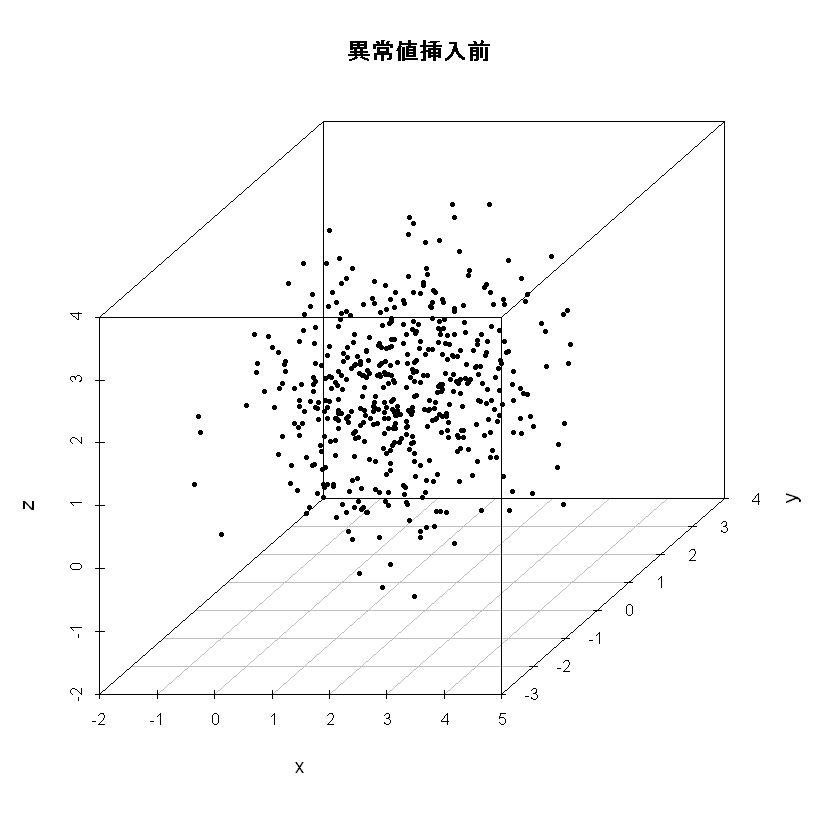

In [10]:
scatterplot3d(d, pch=19, cex.symbols=0.5, main="異常値挿入前")

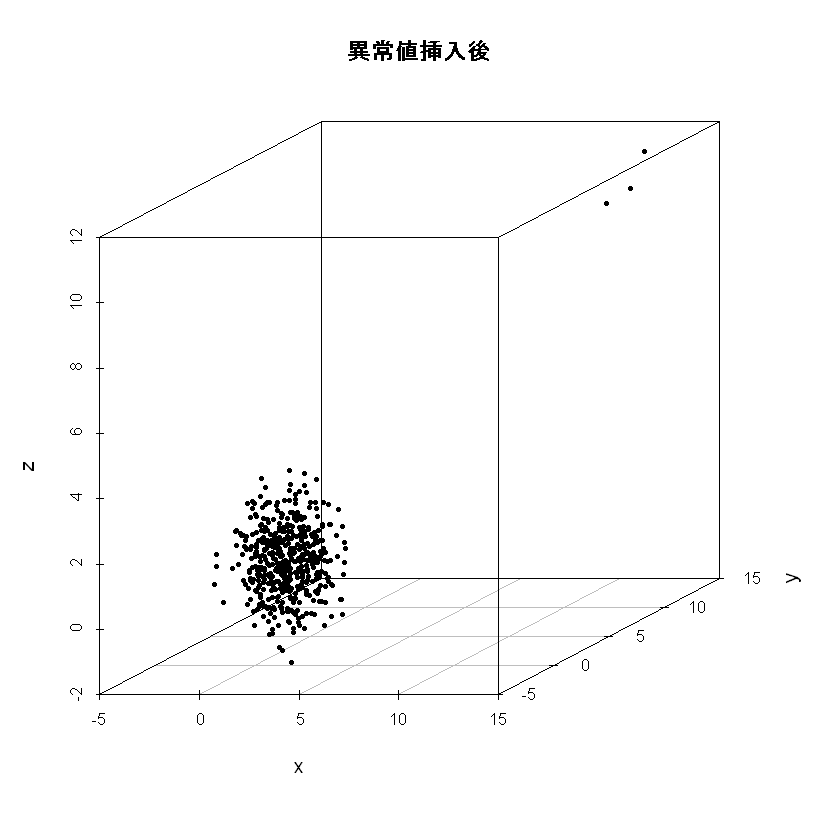

In [14]:
idx <- sample(nrow(d), 3)
d[idx,] <- d[idx,] + 10
scatterplot3d(d, pch=19, cex.symbols=0.5, main="異常値挿入後")

In [15]:
X <- as.matrix(d)
mx <- colMeans(X)

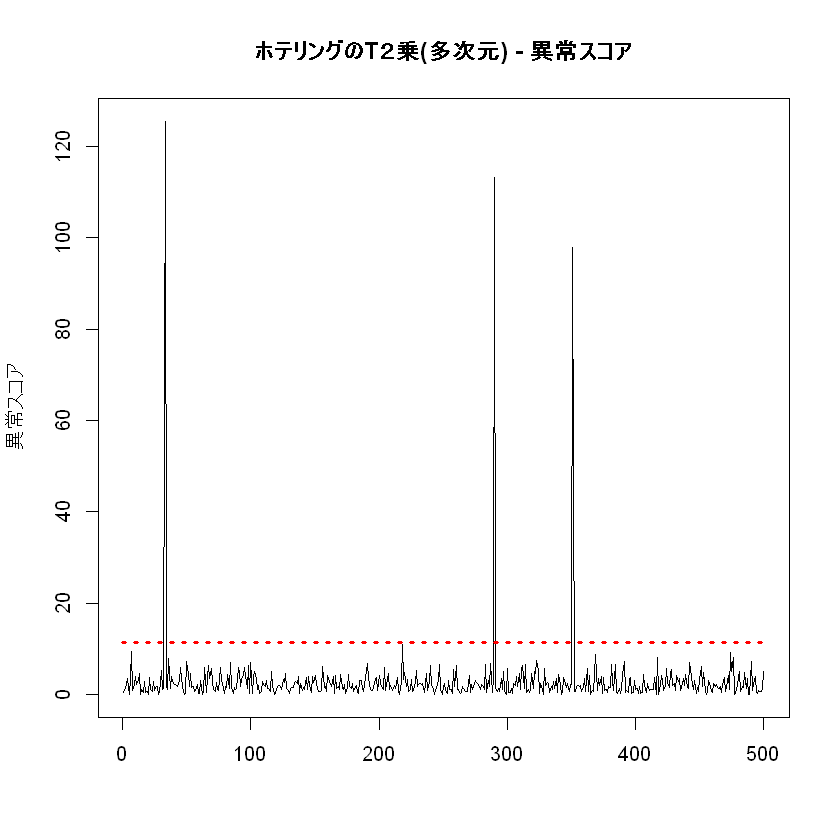

In [29]:
Xc <- as.matrix(X) - matrix(1, nrow(X), 1) %*% mx
Sx <- t(Xc) %*% Xc / nrow(X)
am <- rowSums((Xc %*% solve(Sx)) * Xc)
thr <- qchisq(0.99, 3)
plot(am, main="ホテリングのT２乗(多次元) - 異常スコア", type="l",xlab="", ylab="異常スコア")
segments(0, thr, 500, thr, col='red', lty=3, lwd=3)

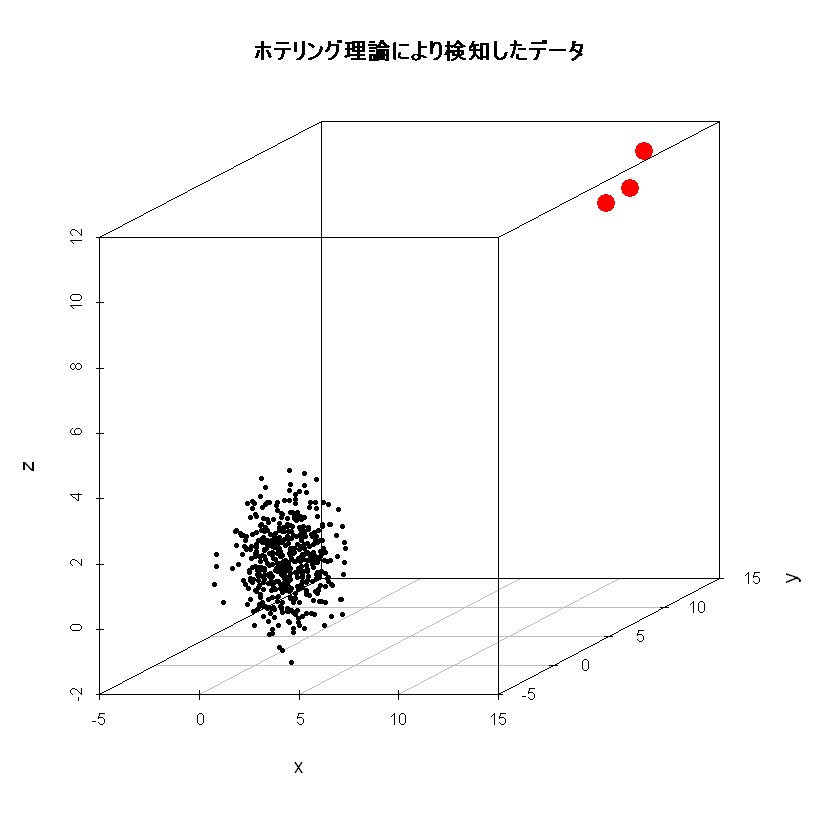

In [28]:
idx_a <- which(am > thr)
col_3d <- rep(1, 500)
col_3d[idx_a] <- 2
cex_3d <- rep(0.5,500)
cex_3d[idx_a] <- 2
scatterplot3d(d, pch=19, cex.symbols=cex_3d, color=col_3d,main="ホテリング理論により検知したデータ")